In [1]:
import pandas
tallies = pandas.read_csv("2015 ballots.csv")

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

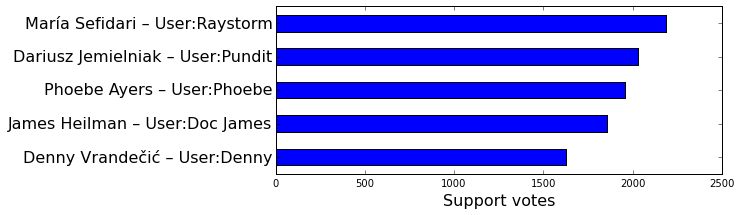

In [11]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)

tallies.sort_values(by='Support', ascending=False, inplace=True)
tallies['Support'].head(5).plot(kind='barh', ax=ax)

ax.set_xlabel('Support votes', fontsize=16)
ax.set_yticklabels(tallies['Candidate'].head(5).as_matrix(), fontsize=16);
ax.invert_yaxis()

plt.savefig('total_support.png', bbox_inches='tight', dpi=300)

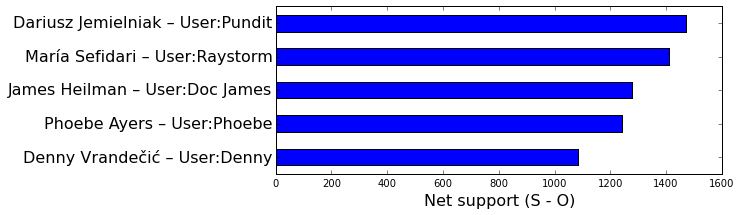

In [12]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)

tallies = tallies.assign(net_support = lambda x: x.Support - x.Oppose)
tallies.sort_values(by='net_support', ascending=False, inplace=True)

tallies['net_support'].head(5).plot(kind='barh', ax=ax)

ax.set_xlabel('Net support (S - O)', fontsize=16)

ax.set_yticklabels(tallies['Candidate'].head(5).as_matrix(), fontsize=16);
ax.invert_yaxis()

plt.savefig('net_support.png', bbox_inches='tight', dpi=300)

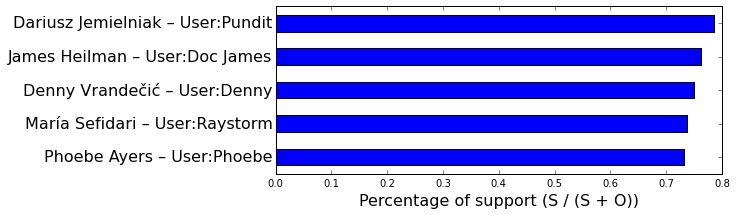

In [13]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)

tallies = tallies.assign(support_percentage = lambda x: x.Support / (x.Support + x.Oppose))
tallies.sort_values(by='support_percentage', ascending=False, inplace=True)

tallies['support_percentage'].head(5).plot(kind='barh', ax=ax)

ax.set_xlabel('Percentage of support (S / (S + O))', fontsize=16)

ax.set_yticklabels(tallies['Candidate'].head(5).as_matrix(), fontsize=16);
ax.invert_yaxis()

plt.savefig('support_percentage.png', bbox_inches='tight', dpi=300)